In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

In [19]:
df = pd.read_excel("C:\\Users\\yapingxu\\Documents\\TimeSeriesPython\\Oahu\\DataCSV.xlsx")

In [6]:
df['Value'].describe

<bound method NDFrame.describe of 0       0.0857
1       0.1533
2       0.1519
3       0.2022
4       0.1728
5       0.1967
6       0.1721
7       0.1470
8       0.2179
9       0.2285
10      0.2377
11      0.2066
12      0.1418
13      0.0628
14      0.1172
15      0.0958
16      0.3169
17      0.1164
18      0.1759
19      0.1676
20      0.1489
21      0.1673
22      0.1484
23      0.2728
24      0.2316
25      0.2400
26      0.2058
27      0.2097
28      0.1248
29      0.1632
         ...  
1563    0.1232
1564    0.0974
1565    0.1162
1566    0.1196
1567    0.1744
1568    0.0848
1569    0.0865
1570    0.0898
1571    0.0928
1572    0.1528
1573    0.3450
1574    0.1187
1575    0.1244
1576    0.0887
1577    0.2583
1578    0.1439
1579    0.1408
1580    0.1003
1581    0.1033
1582    0.0994
1583    0.1447
1584    0.1303
1585    0.1325
1586    0.1127
1587    0.3561
1588    0.1527
1589    0.1333
1590    0.3848
1591    0.2061
1592    0.1058
Name: Value, Length: 1593, dtype: float64>

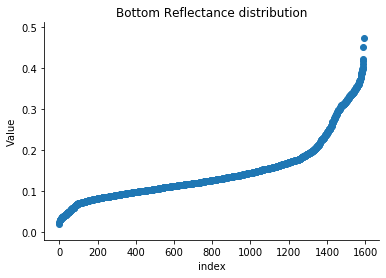

In [20]:
plt.scatter(range(df.shape[0]), np.sort(df['Value'].values))
plt.xlabel('index')
plt.ylabel('Value')
plt.title("Bottom Reflectance distribution")
sns.despine()

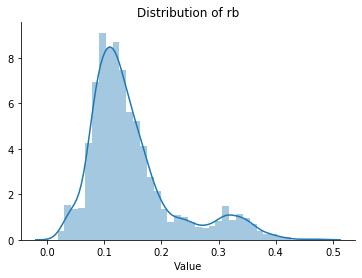

In [21]:
sns.distplot(df['Value'])
plt.title("Distribution of rb")
sns.despine()

In [22]:
print("Skewness: %f" % df['Value'].skew())
print("Kurtosis: %f" % df['Value'].kurt())

Skewness: 1.427012
Kurtosis: 1.737499


C:\Users\yapingxu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\yapingxu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\yapingxu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


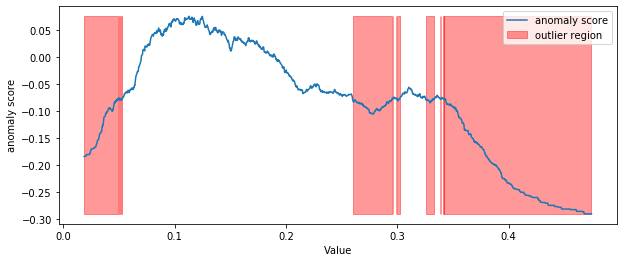

In [23]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['Value'].values.reshape(-1, 1))
xx = np.linspace(df['Value'].min(), df['Value'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Value')
plt.show();

In [11]:
df.iloc[10]

Date     2.019070e+07
Value    2.377000e-01
Name: 10, dtype: float64

In [12]:
df.iloc[1]

Date     2.019070e+07
Value    1.533000e-01
Name: 1, dtype: float64

In [13]:
df.iloc[1000]

Date     2.019080e+07
Value    6.900000e-02
Name: 1000, dtype: float64

In [16]:
df.iloc[1592]

Date     2.019083e+07
Value    1.058000e-01
Name: 1592, dtype: float64

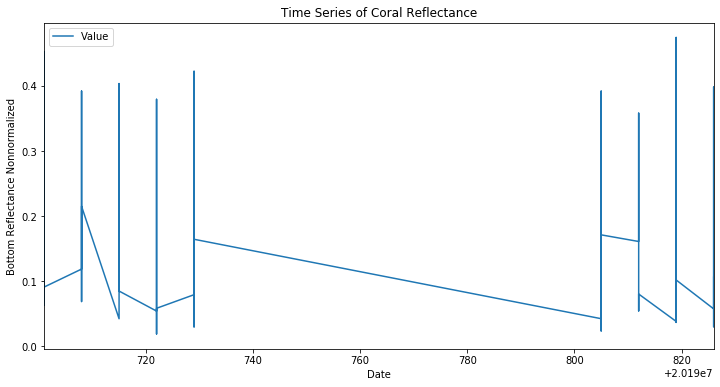

In [24]:
df.plot(x='Date', y='Value', figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Bottom Reflectance Nonnormalized')
plt.title('Time Series of Coral Reflectance');

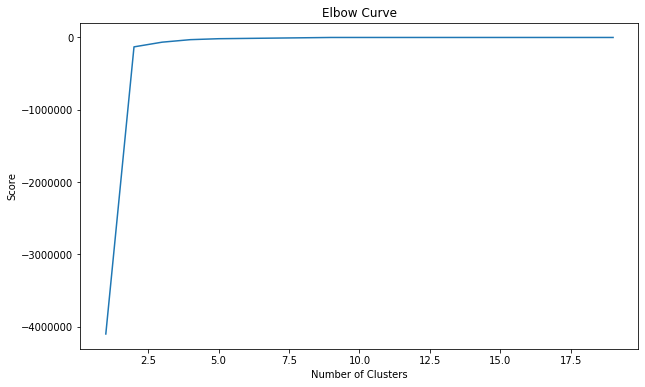

In [33]:
data = df[['Value', 'Date']]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

In [39]:
X = df[['Value', 'Date']]
X = X.reset_index(drop=True)
km = KMeans(n_clusters=3)
km.fit(X)
km.predict(X)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2],
          c=labels.astype(np.float), edgecolor="k")
ax.set_xlabel("Date")
ax.set_ylabel("Bottom Reflectance Nonnormalized")
plt.title("K Means", fontsize=14);

NameError: name 'Axes3D' is not defined

<Figure size 504x504 with 0 Axes>

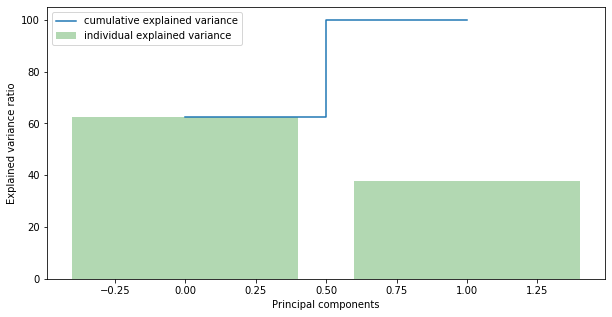

In [36]:
from sklearn.preprocessing import StandardScaler
data = df[['Value', 'Date']]
X = data.values
X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

C:\Users\yapingxu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


KeyError: 'principal_feature1'

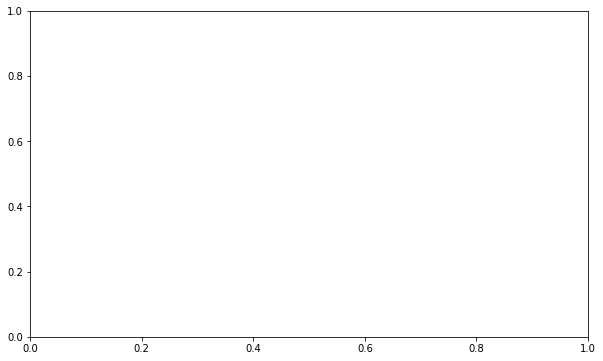

In [41]:
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance

outliers_fraction = 0.01
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[9])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
df['anomaly1'] = (distance >= threshold).astype(int)

# visualisation of anomaly with cluster view
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(df['principal_feature1'], c=df["anomaly1"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.show();

KeyError: 'anomaly1'

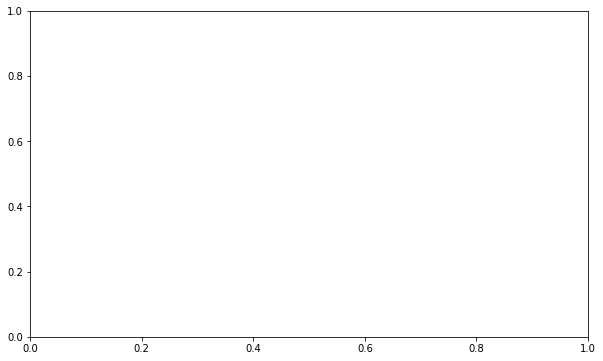

In [37]:
df = df.sort_values('Date')
df['date_int'] = df.Date.astype(np.int64)
fig, ax = plt.subplots(figsize=(10,6))
a = df.loc[df['anomaly1'] == 1, ['date_int', 'Value']] #anomaly

ax.plot(df['date_int'], df['Value'], color='blue', label='Normal')
ax.scatter(a['date_int'],a['Value'], color='red', label='Anomaly')
plt.xlabel('Date Integer')
plt.ylabel('Bottom Reflectance')
plt.legend()
plt.show();

C:\Users\yapingxu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\yapingxu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


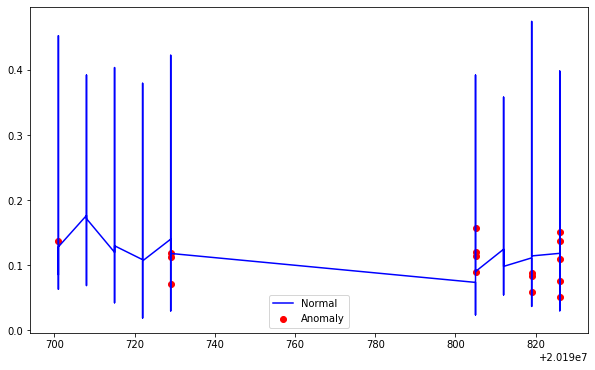

In [45]:
data = df[['Value', 'Date']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data) 
df['anomaly2'] = pd.Series(model.predict(data))

# visualization
fig, ax = plt.subplots(figsize=(10,6))

a = df.loc[df['anomaly2'] == -1, ['Date', 'Value']] #anomaly

ax.plot(df['Date'], df['Value'], color='blue', label = 'Normal')
ax.scatter(a['Date'],a['Value'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

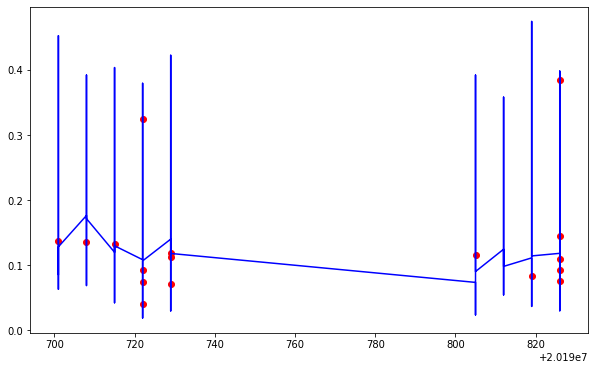

In [47]:
# Anomaly detection using SVM
from sklearn.svm import OneClassSVM # import oneclassSVM
data = df[['Value', 'Date']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train oneclassSVM 
model = OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.01)
model.fit(data)
df['anomaly3'] = pd.Series(model.predict(data))

fig, ax = plt.subplots(figsize=(10,6))
a = df.loc[df['anomaly3'] == -1, ['Date', 'Value']] #anomaly

ax.plot(df['Date'], df['Value'], color='blue', label = 'Normal')
ax.scatter(a['Date'],a['Value'], color='red', label = 'Anomaly')
plt.show();

In [48]:
df_class0 = df.loc[df['srch_saturday_night_bool'] == 0, 'price_usd']
df_class1 = df.loc[df['srch_saturday_night_bool'] == 1, 'price_usd']

envelope =  EllipticEnvelope(contamination = outliers_fraction) 
X_train = df_class0.values.reshape(-1,1)
envelope.fit(X_train)
df_class0 = pd.DataFrame(df_class0)
df_class0['deviation'] = envelope.decision_function(X_train)
df_class0['anomaly'] = envelope.predict(X_train)

envelope =  EllipticEnvelope(contamination = outliers_fraction) 
X_train = df_class1.values.reshape(-1,1)
envelope.fit(X_train)
df_class1 = pd.DataFrame(df_class1)
df_class1['deviation'] = envelope.decision_function(X_train)
df_class1['anomaly'] = envelope.predict(X_train)

df_class = pd.concat([df_class0, df_class1])
df['anomaly5'] = df_class['anomaly']
fig, ax = plt.subplots(figsize=(10, 6))
a = df.loc[df['anomaly5'] == -1, ('date_time_int', 'price_usd')] #anomaly
ax.plot(df['date_time_int'], df['price_usd'], color='blue')
ax.scatter(a['date_time_int'],a['price_usd'], color='red')
plt.show();

KeyError: 'srch_saturday_night_bool'